# Introduction to neural network classification with tensorflow

In this notebook we're goinf to learn how to write neural networks for classification problems.

Types of classification problems:
* Binary classification
* Multiclass Classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples= n_samples,
noise= 0.03,
random_state= 42)

In [4]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

OUr data is little hard to understand right now... let's visualise

In [7]:
import pandas as pd
circles= pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


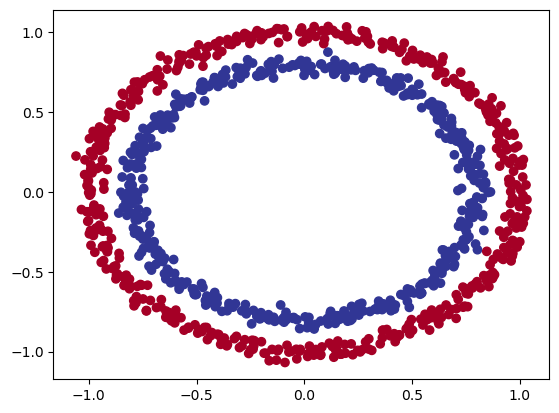

In [11]:
# Visualise with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap= plt.cm.RdYlBu)

## Input and Output shapes

In [12]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

Steps in modelling:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate
5. Tweak
6. Repeat

# Import tensorflow

In [15]:
import tensorflow as tf

In [16]:
tf.random.set_seed(42) 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

model.fit(X, y, epochs= 5)

Epoch 1/5
32/32 [==============================] - 0s 543us/step - loss: 4.4287 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 467us/step - loss: 4.4049 - accuracy: 0.4750
Epoch 3/5
32/32 [==============================] - 0s 400us/step - loss: 4.3679 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 351us/step - loss: 4.3484 - accuracy: 0.4710
Epoch 5/5
32/32 [==============================] - 0s 340us/step - loss: 4.3413 - accuracy: 0.4680


In [17]:
# Let's try and imporve our model by training longer
model.fit(X, y, epochs= 200, verbose= 0)
model.evaluate(X, y)

32/32 [==============================] - 0s 360us/step - loss: 0.6932 - accuracy: 0.4490


[0.6931520104408264, 0.4490000009536743]

Since we are workling on a binary classification problem and our model is getting around 50% accuracy, it's performing as it is guessing.

So let's step things up and add an extra layer.

In [18]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['accuracy'])

model_1.fit(X, y, epochs= 100, verbose= 0)

In [19]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 493us/step - loss: 0.6933 - accuracy: 0.5000


[0.6932723522186279, 0.5]

In [20]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

# Improving our model

Let's look in to our bag of tricks to see how we can imporve our model.

1. Create a model - We might want to:
    1. Add more layers
    2. Add more units
2. Compiling a model: We might want to:
    1. Choose a different optimiser function
3. Fitting a model: We might fit for more epochs

In [21]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(), 
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_2.fit(X, y, epochs= 100, verbose= 0)

In [22]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 420us/step - loss: 0.6975 - accuracy: 0.5110


[0.6974705457687378, 0.5109999775886536]

In [25]:
y_pred = model_2.predict(X)
y_pred

32/32 [==============================] - 0s 350us/step


array([[0.48665294],
       [0.56231046],
       [0.566275  ],
       [0.56665736],
       [0.45424223],
       [0.57044256],
       [0.55154055],
       [0.48213252],
       [0.49070376],
       [0.5666082 ],
       [0.5262362 ],
       [0.52281654],
       [0.55819905],
       [0.46331406],
       [0.4593064 ],
       [0.4731872 ],
       [0.5503138 ],
       [0.47625673],
       [0.55458325],
       [0.5175205 ],
       [0.50276273],
       [0.58242786],
       [0.47419432],
       [0.4894361 ],
       [0.5834432 ],
       [0.5737685 ],
       [0.5434484 ],
       [0.46625924],
       [0.46955296],
       [0.4616002 ],
       [0.49353954],
       [0.5707401 ],
       [0.54953146],
       [0.4640693 ],
       [0.47467712],
       [0.58707494],
       [0.57050616],
       [0.5235356 ],
       [0.470186  ],
       [0.50483316],
       [0.51393044],
       [0.53767544],
       [0.52415365],
       [0.46207494],
       [0.53463763],
       [0.5486516 ],
       [0.45938373],
       [0.537

To visualise our model's predictions, let's create a function 'plot_decision_boundary()'. This function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different feature values
* Make predictions across the meshgrid* Plot the predictions as well as a line between zones

In [26]:
import numpy as np

In [41]:
def plot_decision_boundary(model, X, y):
    """
    PLots the decision boundary created by a model predicting on X.
    This function was inspired my two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    #Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contour(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha= 0.7)
    plt.scatter(X[:, 0], X[:, 1], c= y, s= 40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 259us/step
doing binary classification


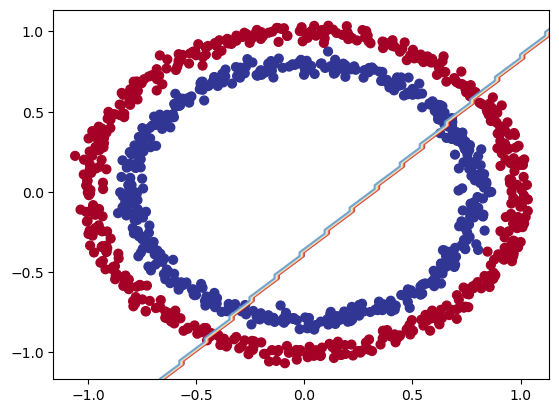

In [42]:
# Check out the predictions our model is making

plot_decision_boundary(model= model_2,
                       X= X, 
                       y= y)